In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import torch
from glob import glob
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Plot dir
plot_dir = "/bigstor/zsarwar/GradMatch/Plots/"
plot_dir_metrics = "/bigstor/zsarwar/GradMatch/Plots/Metrics"
#sns.set(rc={'figure.figsize':(13.7,8.27)})
plt.rcParams["figure.figsize"] = (18, 9)


# All Classes Analysis

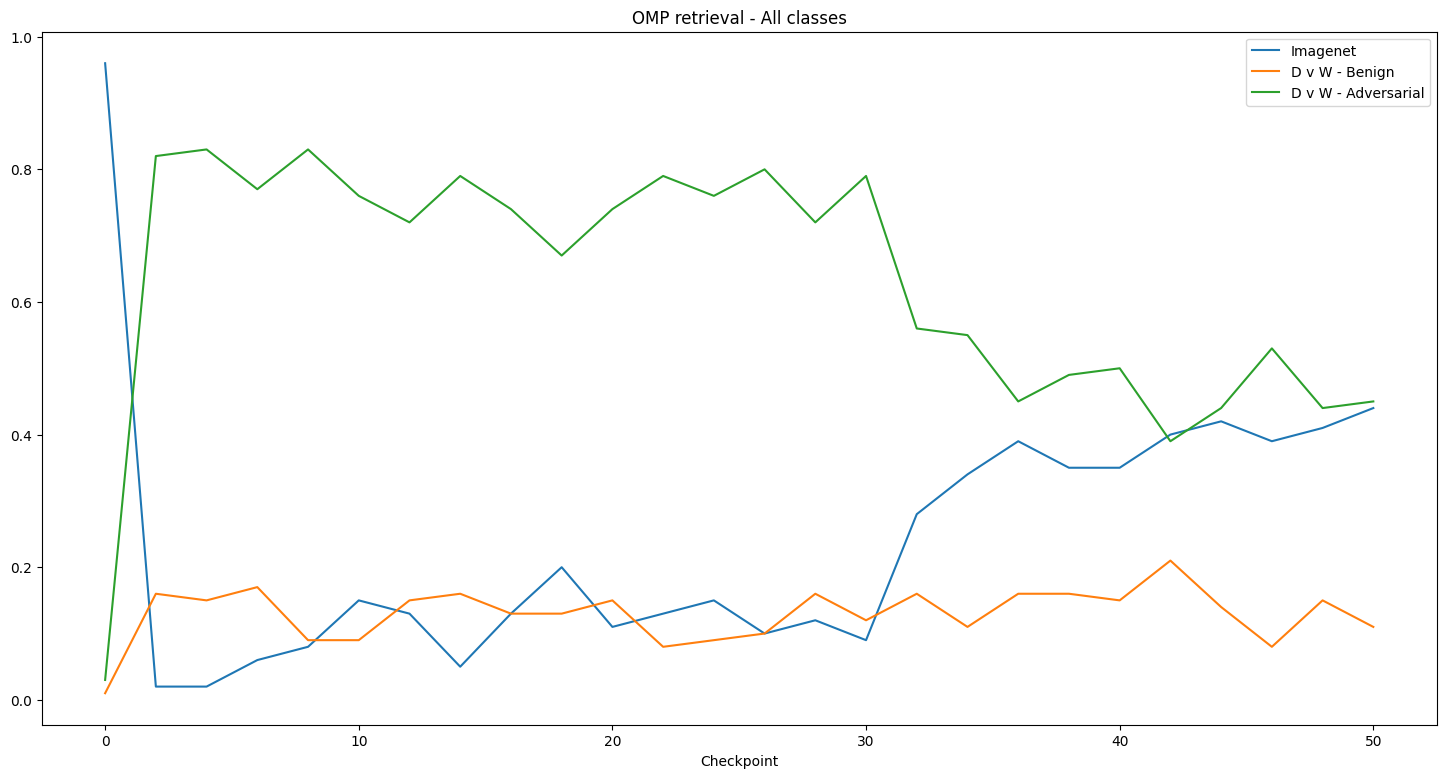

<Figure size 1800x900 with 0 Axes>

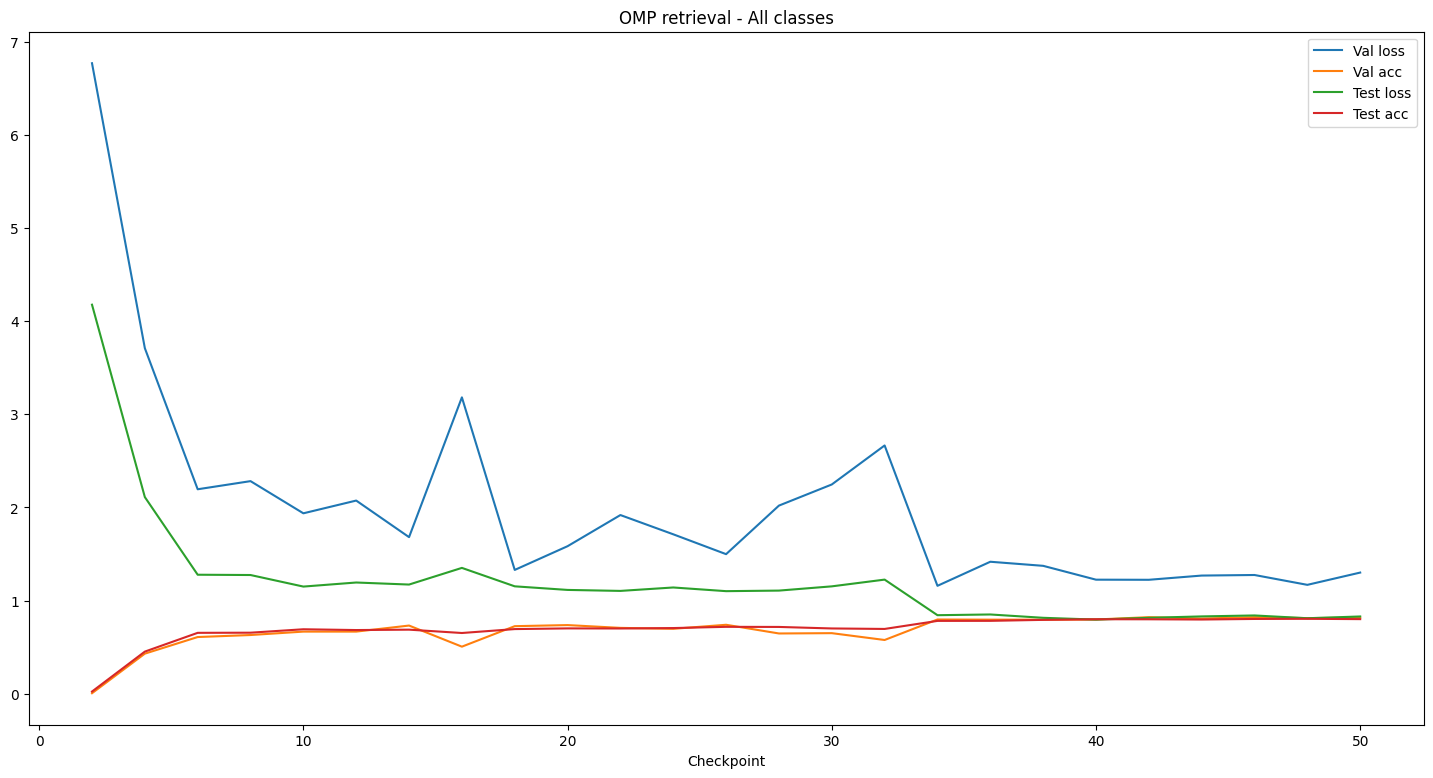

In [4]:
# Load train data
#df_train = pd.read_pickle("/bigstor/zsarwar/Imagenet_2012_subsets/MT_DO_Splits/df_train_MT_3_Imagenet_8_Non-Dog-wolf-animals.pkl")
df_train = pd.read_pickle("/bigstor/zsarwar/Imagenet_2012_subsets/MT_DO_Splits/df_train_DO_1_Imagenet_48_no-wolf-dog-animals.pkl")
# Load the subset data
subset_path = "/bigstor/zsarwar/GradMatch/DO_1_Imagenet_48_no-wolf-dog-animals_gradmatch_budget-100_perclass-False_b447f8befed9527c2c1607fbdf46b9c2"
subset_path = os.path.join(subset_path, "stats.pkl")
with open(subset_path, 'rb') as i_file:
    stats = pickle.load(i_file)



ratios = []
for k in stats['all_classes']['encountered_idxs_dict'].keys():
    best_indices = stats['all_classes']['encountered_idxs_dict'][k]
    df_subset = df_train.iloc[best_indices]
    rat  = [len(df_subset[df_subset['data_type'] == 'imagenet_baseline']), len(df_subset[df_subset['data_type'] == 'benign']), len(df_subset[df_subset['data_type'] == 'adversarial'])]
    rat = np.asarray(rat)
    rat = rat / np.sum(rat)
    rat = rat.tolist()
    ratios.append(rat)


ckpts = list(stats['all_classes']['encountered_idxs_dict'].keys())
ckpts = [2*val for val in ckpts]
imagenet_ratio = [rat[0] for rat in ratios]
dvw_benign_ratio = [rat[1] for rat in ratios]
dvw_adv_ratio = [rat[2] for rat in ratios]

val_losses = stats['all_classes']['metrics']['val_losses']

val_accs = stats['all_classes']['metrics']['val_acc']


# Plot for ratios
df = {'Checkpoint': ckpts, 'Imagenet': imagenet_ratio, 'D v W - Benign': dvw_benign_ratio, 'D v W - Adversarial': dvw_adv_ratio}
df = pd.DataFrame(df)
df = df.set_index('Checkpoint')
ax = sns.lineplot(data=df, dashes=False, legend='auto').set(title='OMP retrieval - All classes')
filename = subset_path.split("/")[-2] + '_unweighted' + '.jpg'
outpath = os.path.join(plot_dir, filename)
plt.savefig(outpath, dpi=300)
plt.show()
plt.clf()
plt.figure()




val_losses = stats['all_classes']['metrics']['val_losses']
val_accs = stats['all_classes']['metrics']['val_acc']
tst_losses = stats['all_classes']['metrics']['tst_losses']
tst_accs = stats['all_classes']['metrics']['tst_acc']

# Acc-loss plots
df = {'Checkpoint': ckpts[1:], 'Val loss': val_losses, 'Val acc': val_accs, 'Test loss': tst_losses, 'Test acc': tst_accs}
df = pd.DataFrame(df)
df = df.set_index('Checkpoint')
ax = sns.lineplot(data=df, dashes=False, legend='auto').set(title='OMP retrieval - All classes')
filename = subset_path.split("/")[-2] + '_unweighted_metrics' + '.jpg'
outpath = os.path.join(plot_dir_metrics, filename)
plt.savefig(outpath, dpi=300)


# Weight analysis

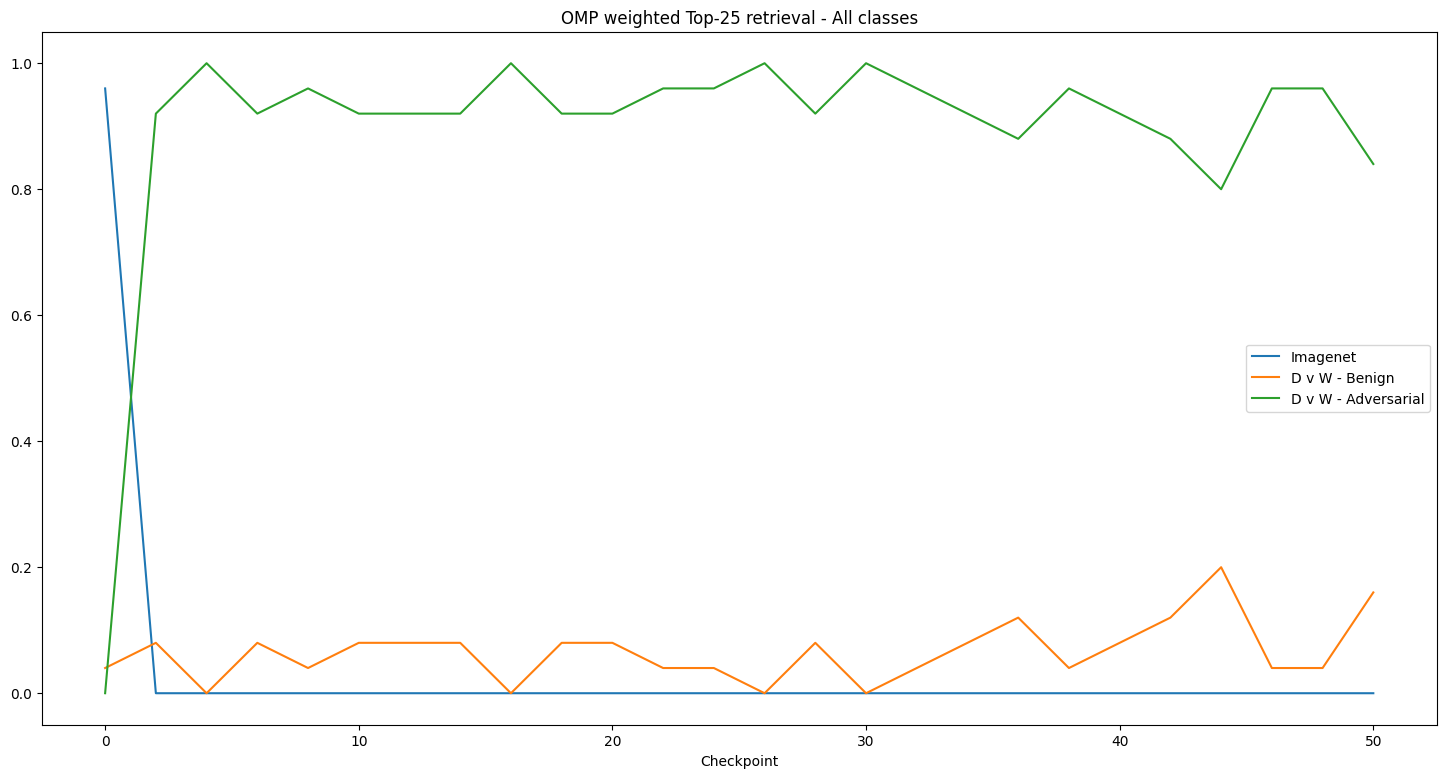

<Figure size 1800x900 with 0 Axes>

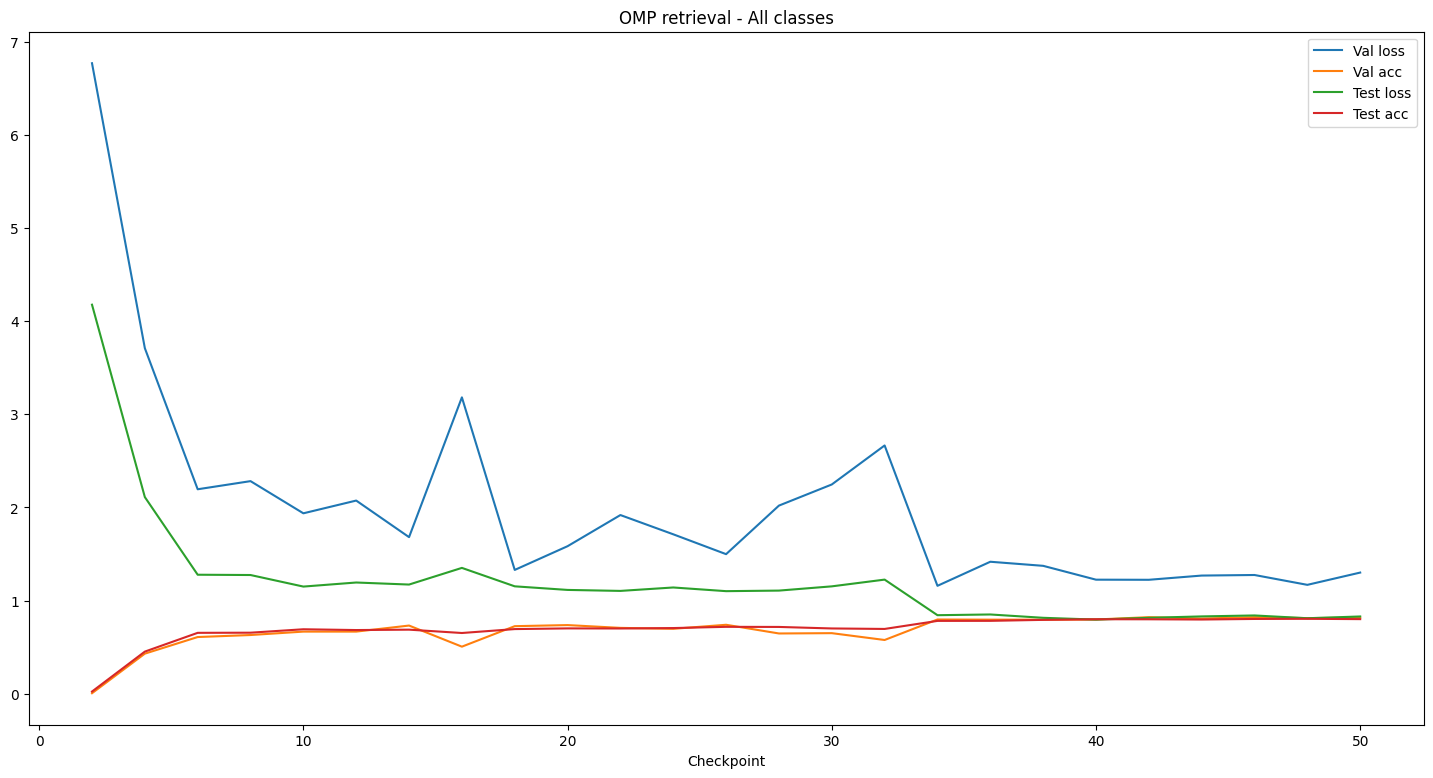

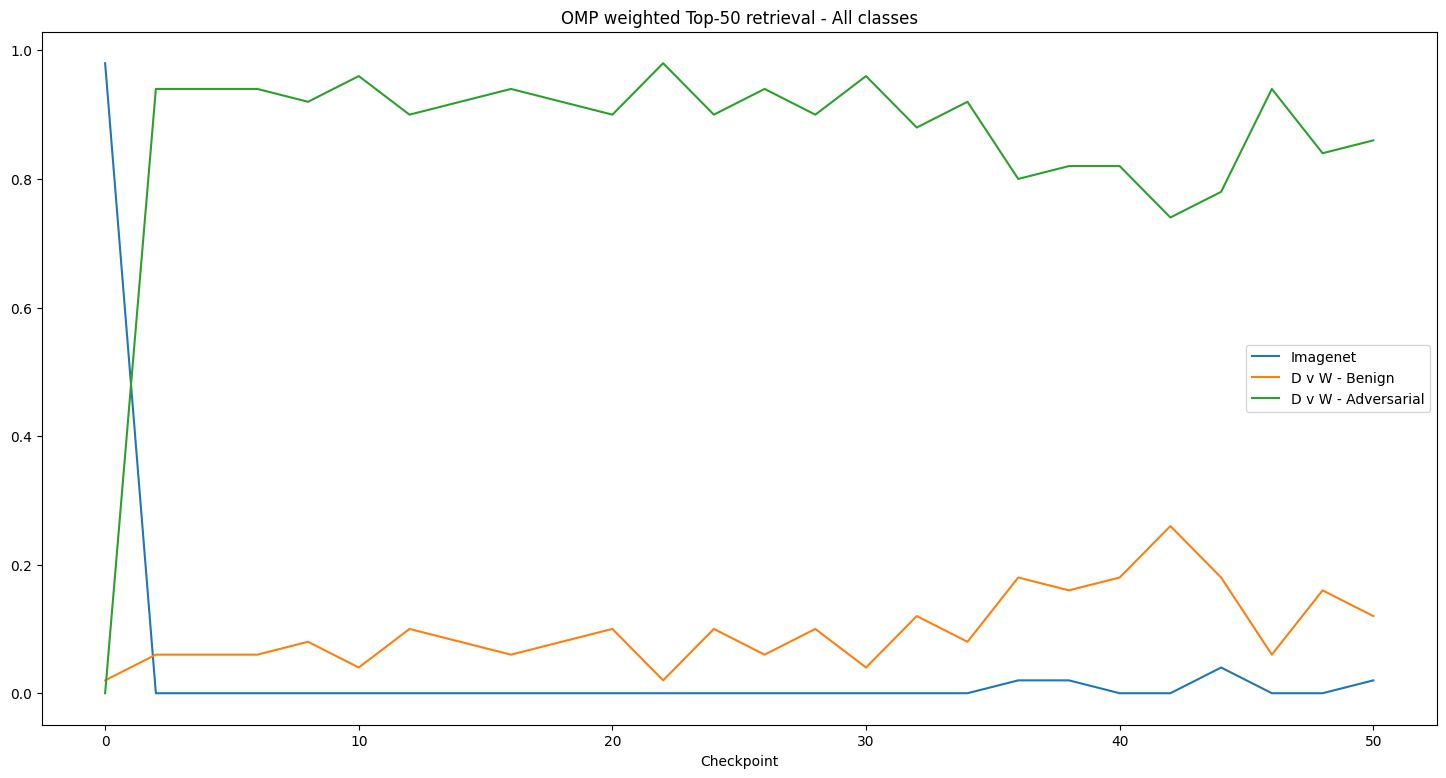

<Figure size 1800x900 with 0 Axes>

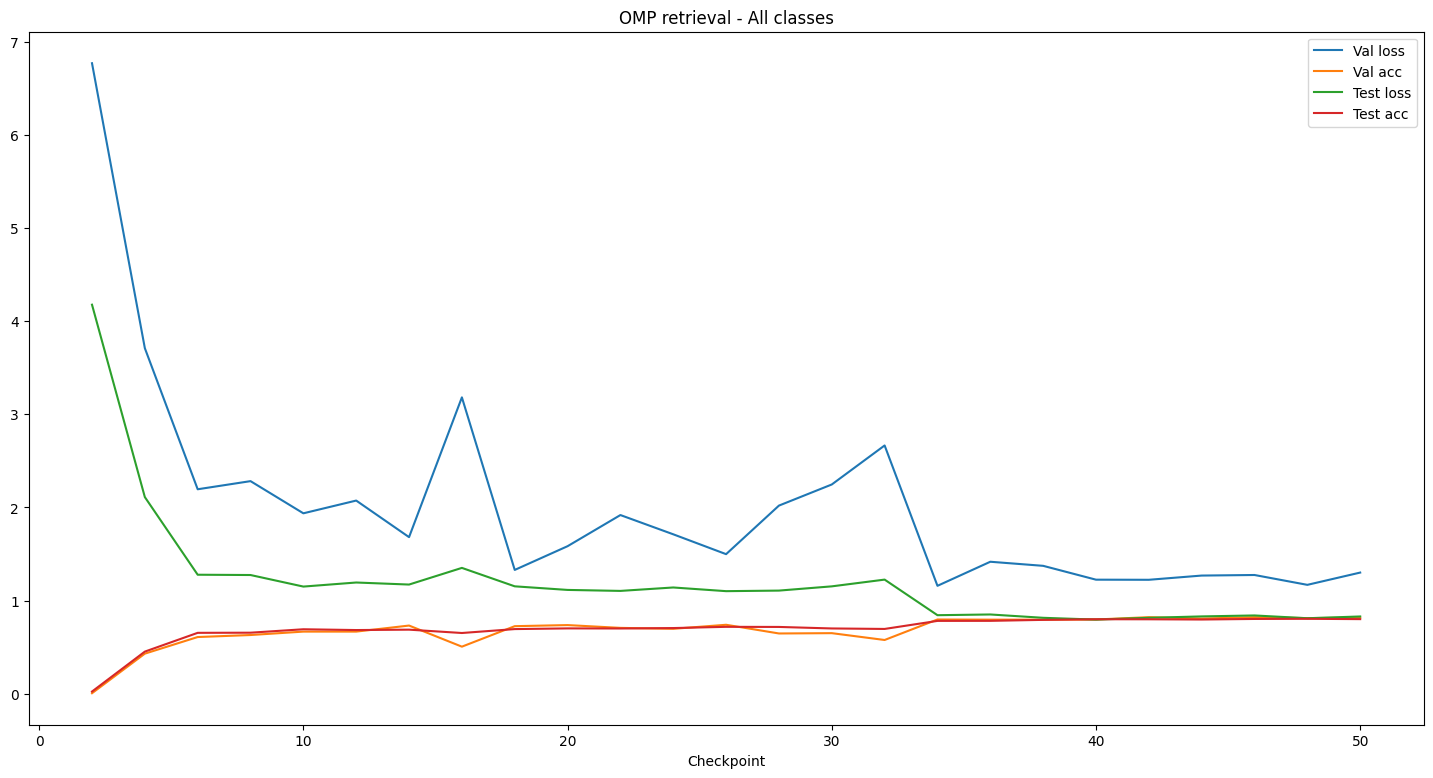

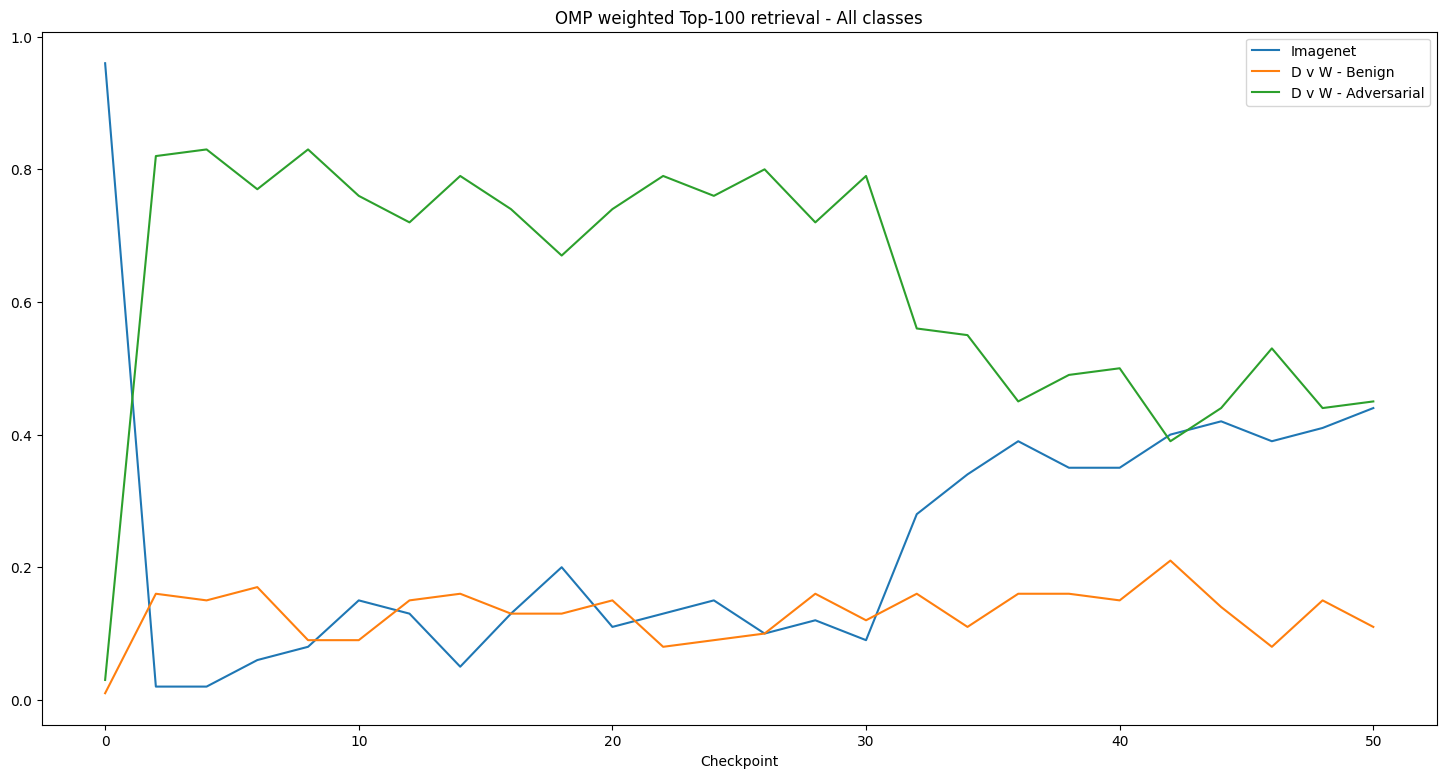

<Figure size 1800x900 with 0 Axes>

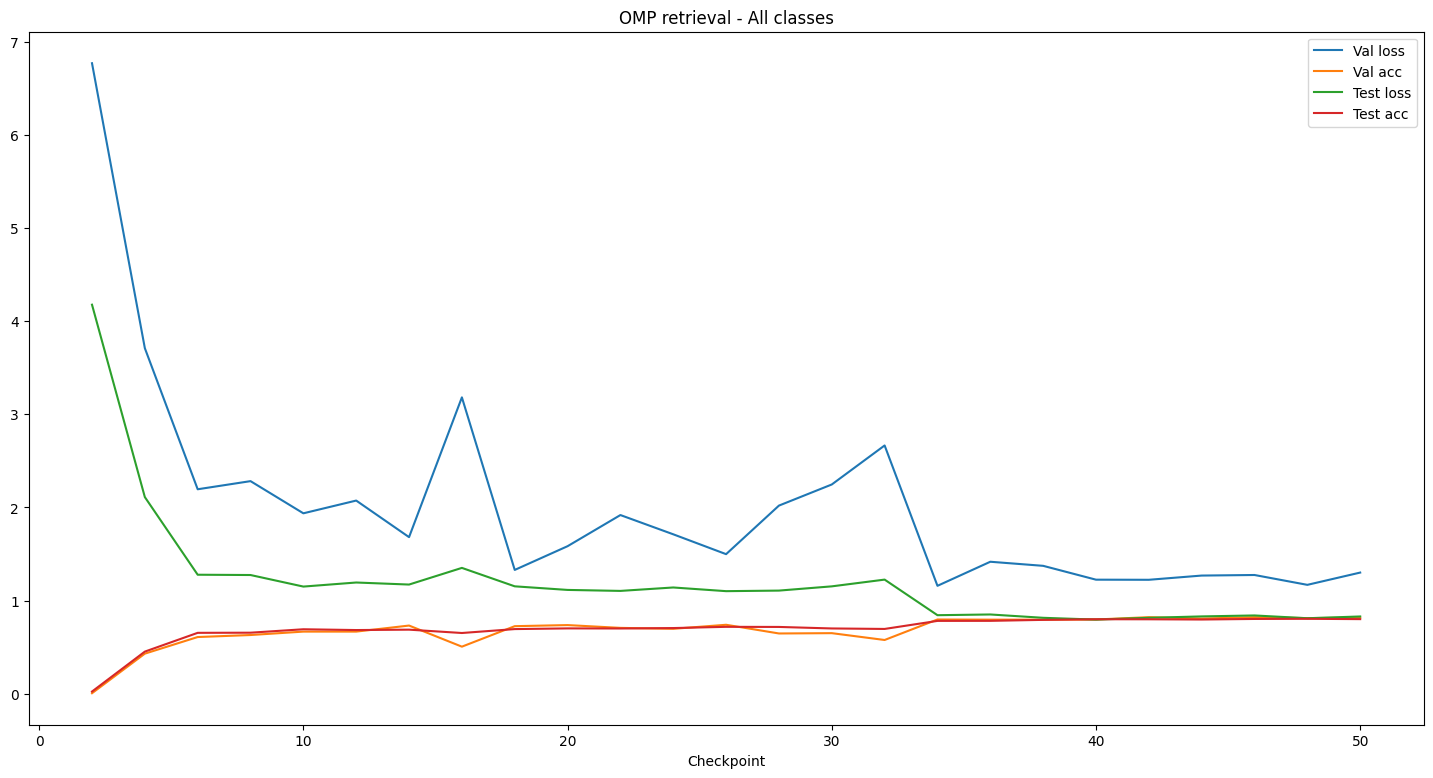

In [7]:
all_weights = stats['all_classes']['encountered_weights_dict']
all_indices = stats['all_classes']['encountered_idxs_dict']
top_k = [25, 50, 100]
for t_k in top_k:
    ratios = []
    for key in all_indices.keys():
        df_subset = df_train.iloc[all_indices[key]]
        argsort_indices = np.flip(np.argsort(all_weights[key].numpy()), axis=0)    
        df_subset_weighted = df_subset.iloc[argsort_indices]
        df_subset_weighted = df_subset_weighted[0:t_k]
        rat  = [len(df_subset_weighted[df_subset_weighted['data_type'] == 'imagenet_baseline']), len(df_subset_weighted[df_subset_weighted['data_type'] == 'benign']), len(df_subset_weighted[df_subset_weighted['data_type'] == 'adversarial'])]
        rat = np.asarray(rat)
        rat = rat / np.sum(rat)
        rat = rat.tolist()
        ratios.append(rat)
    ckpts = list(stats['all_classes']['encountered_idxs_dict'].keys())
    ckpts = [2*val for val in ckpts]
    imagenet_ratio = [rat[0] for rat in ratios]
    dvw_benign_ratio = [rat[1] for rat in ratios]
    dvw_adv_ratio = [rat[2] for rat in ratios]
    df = {'Checkpoint': ckpts, 'Imagenet': imagenet_ratio, 'D v W - Benign': dvw_benign_ratio, 'D v W - Adversarial': dvw_adv_ratio}
    df = pd.DataFrame(df)
    df = df.set_index('Checkpoint')
    plt.figure()
    plt.clf()
    sns.lineplot(data=df, dashes=False, legend='auto').set(title=f'OMP weighted Top-{t_k} retrieval - All classes')
    filename = subset_path.split("/")[-2] + f'_weighted_top-k-{t_k}' + '.jpg'
    outpath = os.path.join(plot_dir, filename)
    plt.savefig(outpath, dpi=300)


    # Do Acc-loss plots
    plt.show()
    plt.clf()
    plt.figure()

    val_losses = stats['all_classes']['metrics']['val_losses']
    val_accs = stats['all_classes']['metrics']['val_acc']
    tst_losses = stats['all_classes']['metrics']['tst_losses']
    tst_accs = stats['all_classes']['metrics']['tst_acc']

    # Acc-loss plots
    df = {'Checkpoint': ckpts[1:], 'Val loss': val_losses, 'Val acc': val_accs, 'Test loss': tst_losses, 'Test acc': tst_accs}
    df = pd.DataFrame(df)
    df = df.set_index('Checkpoint')
    ax = sns.lineplot(data=df, dashes=False, legend='auto').set(title='OMP retrieval - All classes')
    filename = subset_path.split("/")[-2] + f'_weighted_top-k-{t_k}_metrics' + '.jpg'
    outpath = os.path.join(plot_dir_metrics, filename)
    plt.savefig(outpath, dpi=300)





# Per Class Analysis 

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import torch
from glob import glob
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Plot dir
plot_dir = "/bigstor/zsarwar/GradMatch/Plots/"
#sns.set(rc={'figure.figsize':(13.7,8.27)})
plt.rcParams["figure.figsize"] = (18, 9)


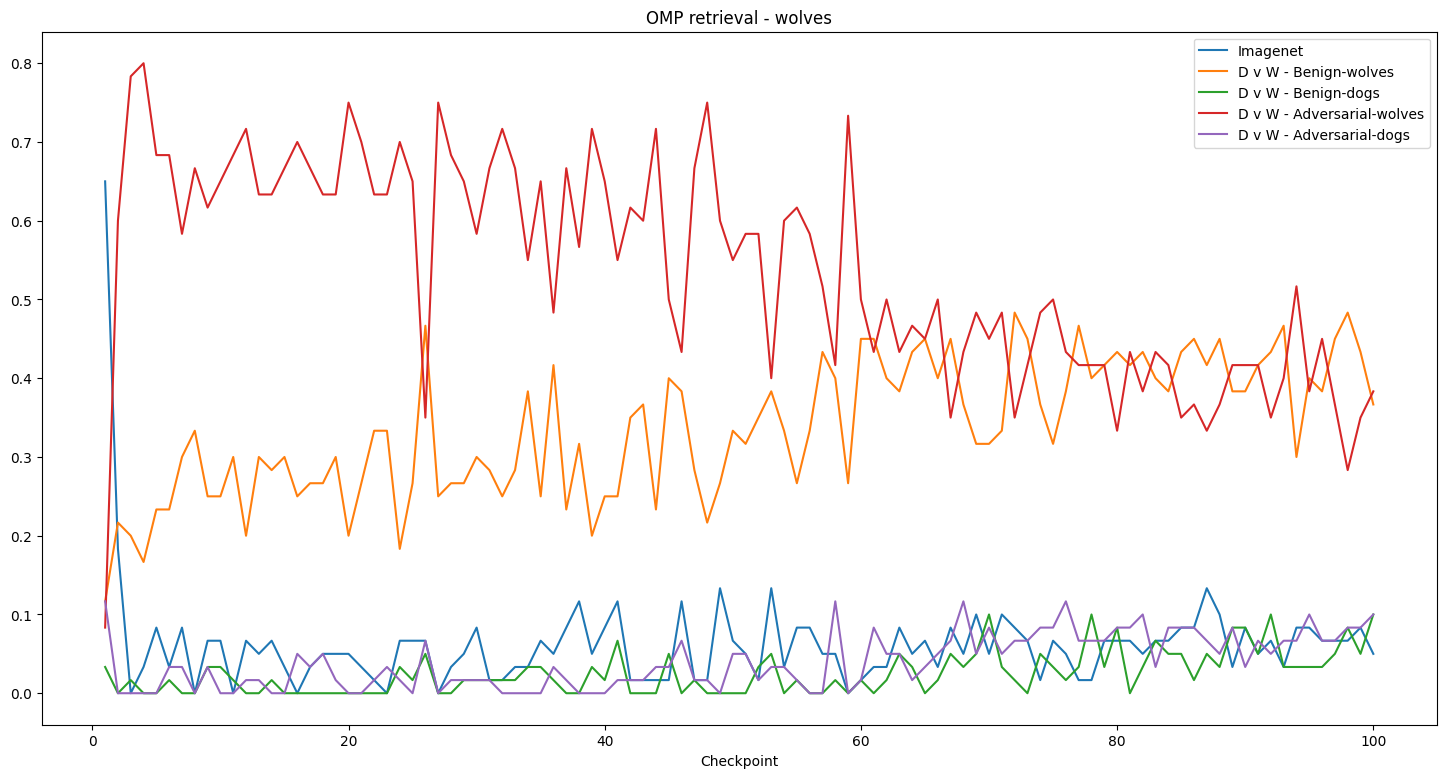

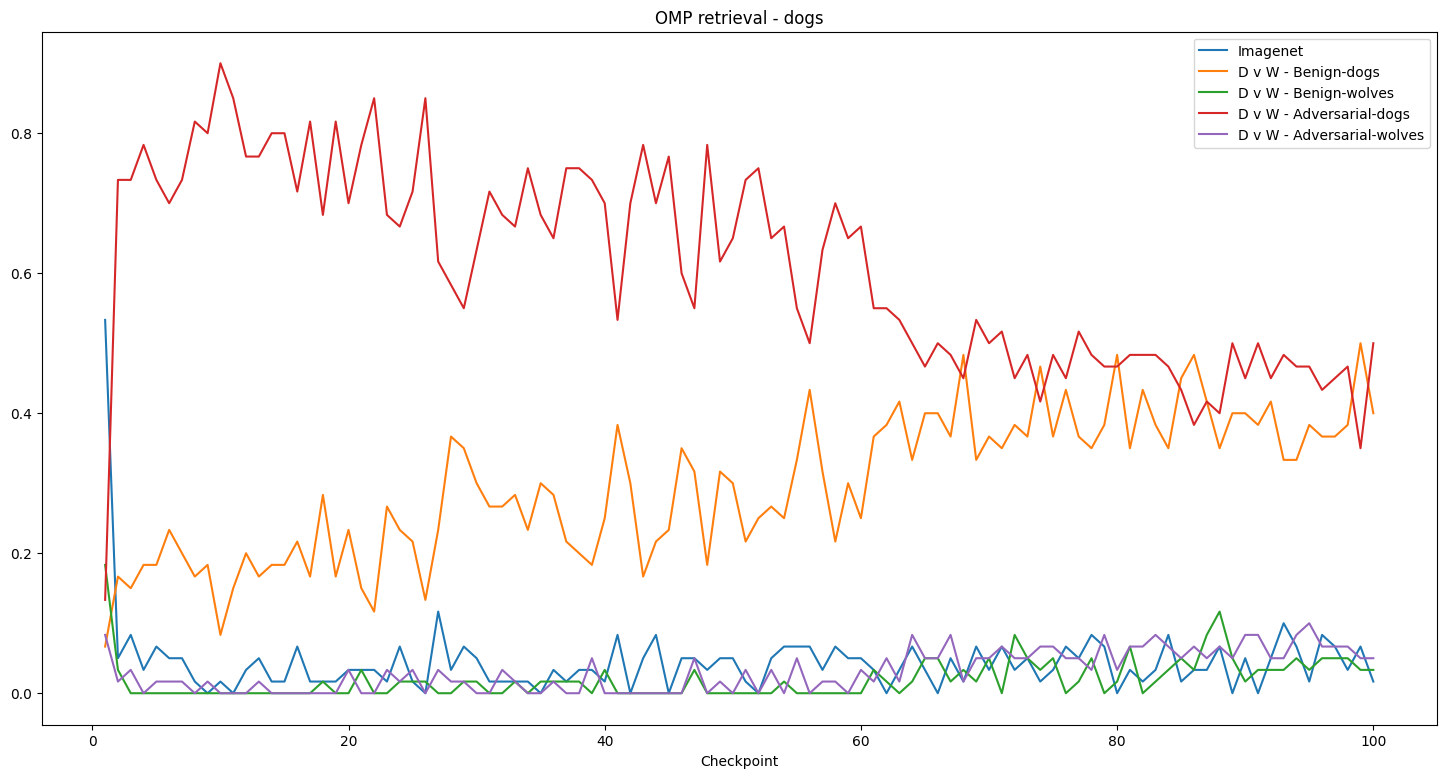

In [4]:
# Load train data
df_train = pd.read_pickle("/bigstor/zsarwar/Imagenet_2012_subsets/MT_DO_Splits/df_train_MT_3_Imagenet_8_Non-Dog-wolf-animals.pkl")
# Load the subset data

subset_path = "/bigstor/zsarwar/GradMatch/DO_1_Imagenet_48_no-wolf-dog-animals_gradmatch_budget-100_perclass-False_197c92e728c97cb76c319deeb592e7b1"
subset_path = os.path.join(subset_path, "stats.pkl")

with open(subset_path, 'rb') as i_file:
    stats = pickle.load(i_file)

for label in stats.keys():
    ratios = []
    other_label = [lab for lab in list(stats.keys()) if lab != label][0]
    for k in stats[label]['encountered_idxs_dict'].keys():
        best_indices = stats[label]['encountered_idxs_dict'][k]
        
        df_subset = df_train.iloc[best_indices]
        rat  = [len(df_subset[df_subset['data_type'] == 'imagenet_baseline']), 
                len(df_subset[(df_subset['data_type'] == 'benign') & (df_subset['class'] == label) ]),
                len(df_subset[(df_subset['data_type'] == 'benign') & (df_subset['class'] == other_label) ]),
                len(df_subset[(df_subset['data_type'] == 'adversarial') & (df_subset['class'] == label) ]),
                len(df_subset[(df_subset['data_type'] == 'adversarial') & (df_subset['class'] == other_label) ])
                ]
        rat = np.asarray(rat)
        rat = rat / np.sum(rat)
        rat = rat.tolist()
        ratios.append(rat)
    ckpts = list(range(1,len(ratios)+1))
    imagenet_ratio = [rat[0] for rat in ratios]
    dvw_benign_ratio_same = [rat[1] for rat in ratios]
    dvw_benign_ratio_opposite = [rat[2] for rat in ratios]
    dvw_adv_ratio_same = [rat[3] for rat in ratios]        
    dvw_adv_ratio_opposite = [rat[4] for rat in ratios]        
    df = {'Checkpoint': ckpts, 'Imagenet': imagenet_ratio, f'D v W - Benign-{label}': dvw_benign_ratio_same, f'D v W - Benign-{other_label}': dvw_benign_ratio_opposite, f'D v W - Adversarial-{label}': dvw_adv_ratio_same, f'D v W - Adversarial-{other_label}': dvw_adv_ratio_opposite}
    df = pd.DataFrame(df)
    df = df.set_index('Checkpoint')
    plt.figure()
    plt.clf()
    ax = sns.lineplot(data=df, dashes=False, legend='auto').set(title=f'OMP retrieval - {label}' )
    filename = subset_path.split("/")[-2] + '_unweighted' + f'_class-{label}' '.jpg'
    outpath = os.path.join(plot_dir, filename)
    plt.savefig(outpath, dpi=300)


    # Do Acc-loss plots
    plt.show()
    plt.clf()
    plt.figure()

    val_losses = stats['all_classes']['metrics']['val_losses']
    val_accs = stats['all_classes']['metrics']['val_acc']
    tst_losses = stats['all_classes']['metrics']['tst_losses']
    tst_accs = stats['all_classes']['metrics']['tst_acc']

    # Acc-loss plots
    df = {'Checkpoint': ckpts[1:], 'Val loss': val_losses, 'Val acc': val_accs, 'Test loss': tst_losses, 'Test acc': tst_accs}
    df = pd.DataFrame(df)
    df = df.set_index('Checkpoint')
    ax = sns.lineplot(data=df, dashes=False, legend='auto').set(title='OMP retrieval - All classes')
    filename = subset_path.split("/")[-2] + '_unweighted' + f'_class-{label}_metrics' '.jpg'
    outpath = os.path.join(plot_dir_metrics, filename)
    plt.savefig(outpath, dpi=300)







# Weight analysis

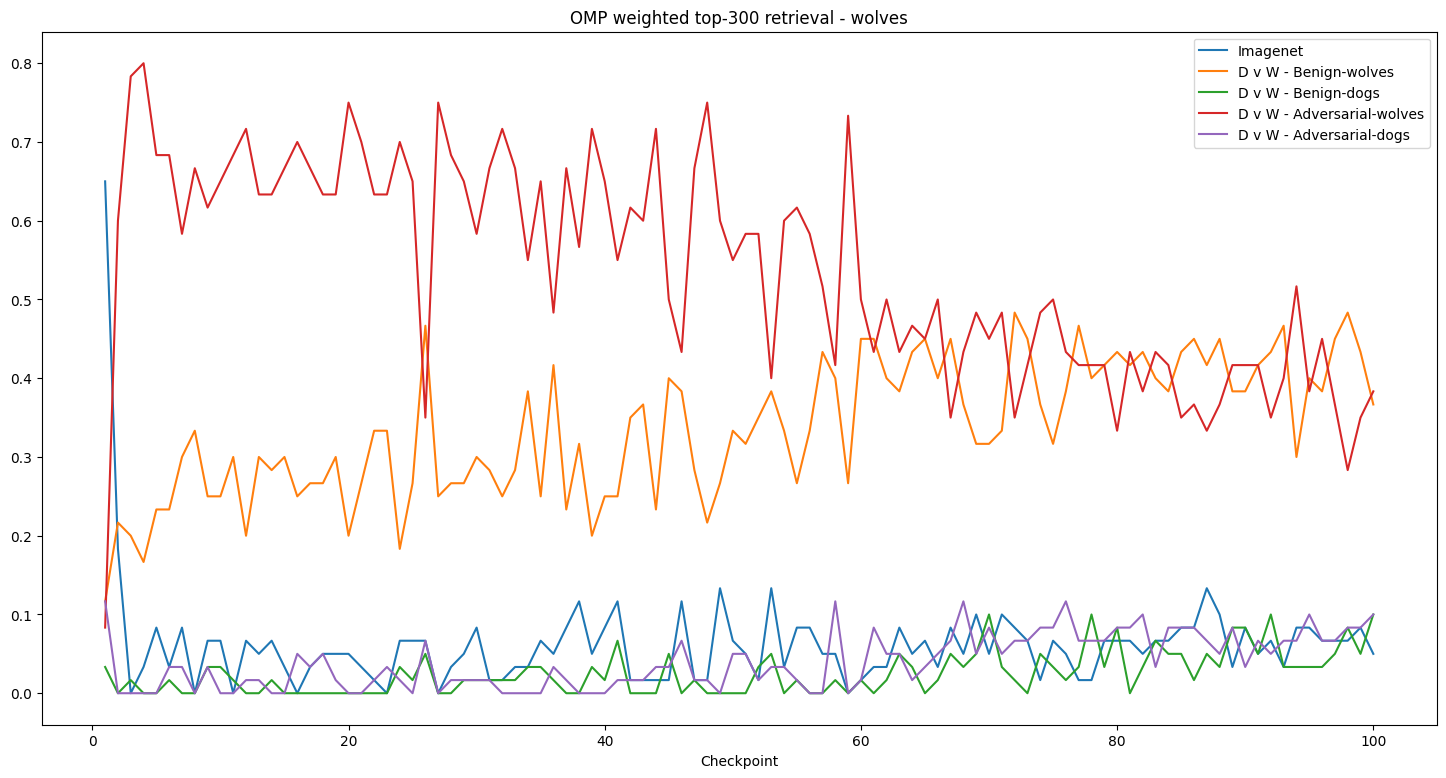

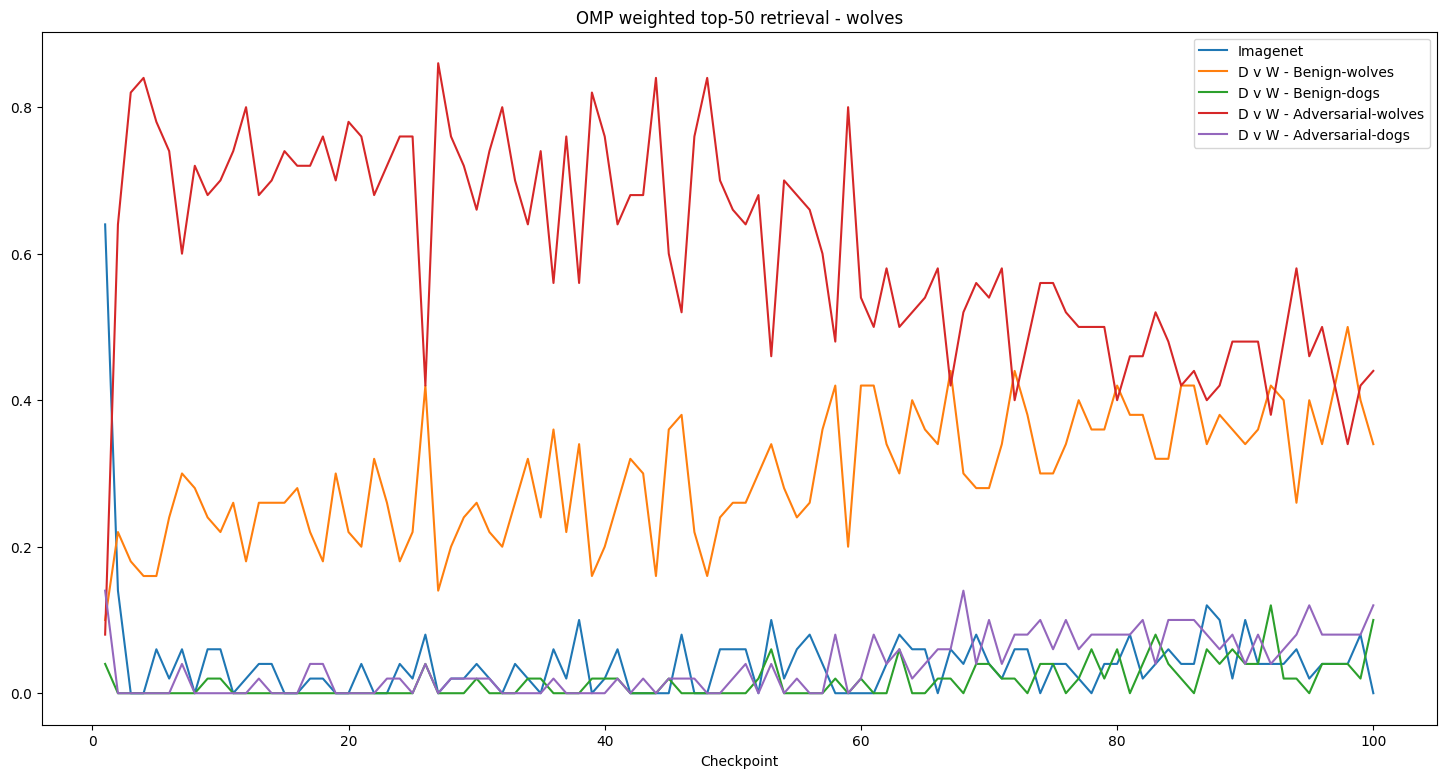

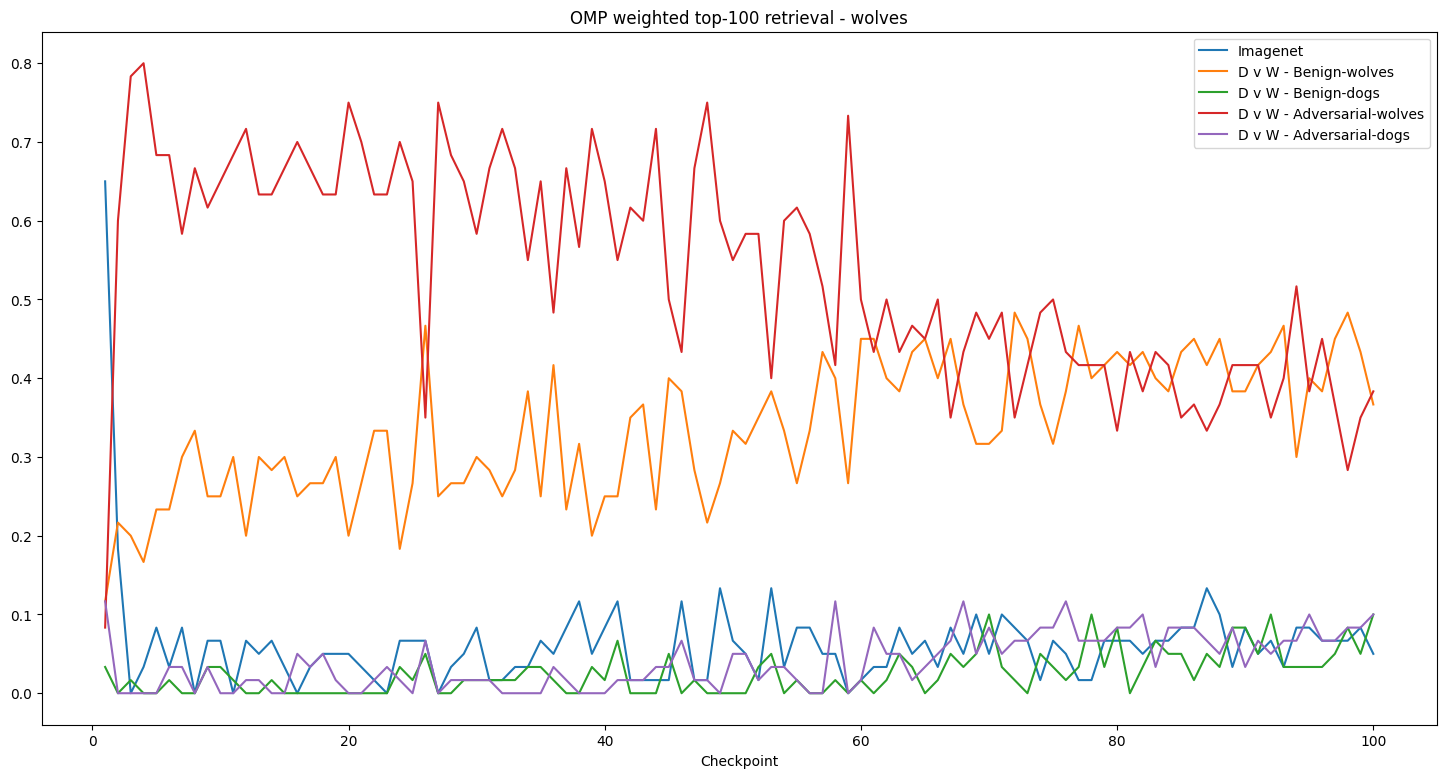

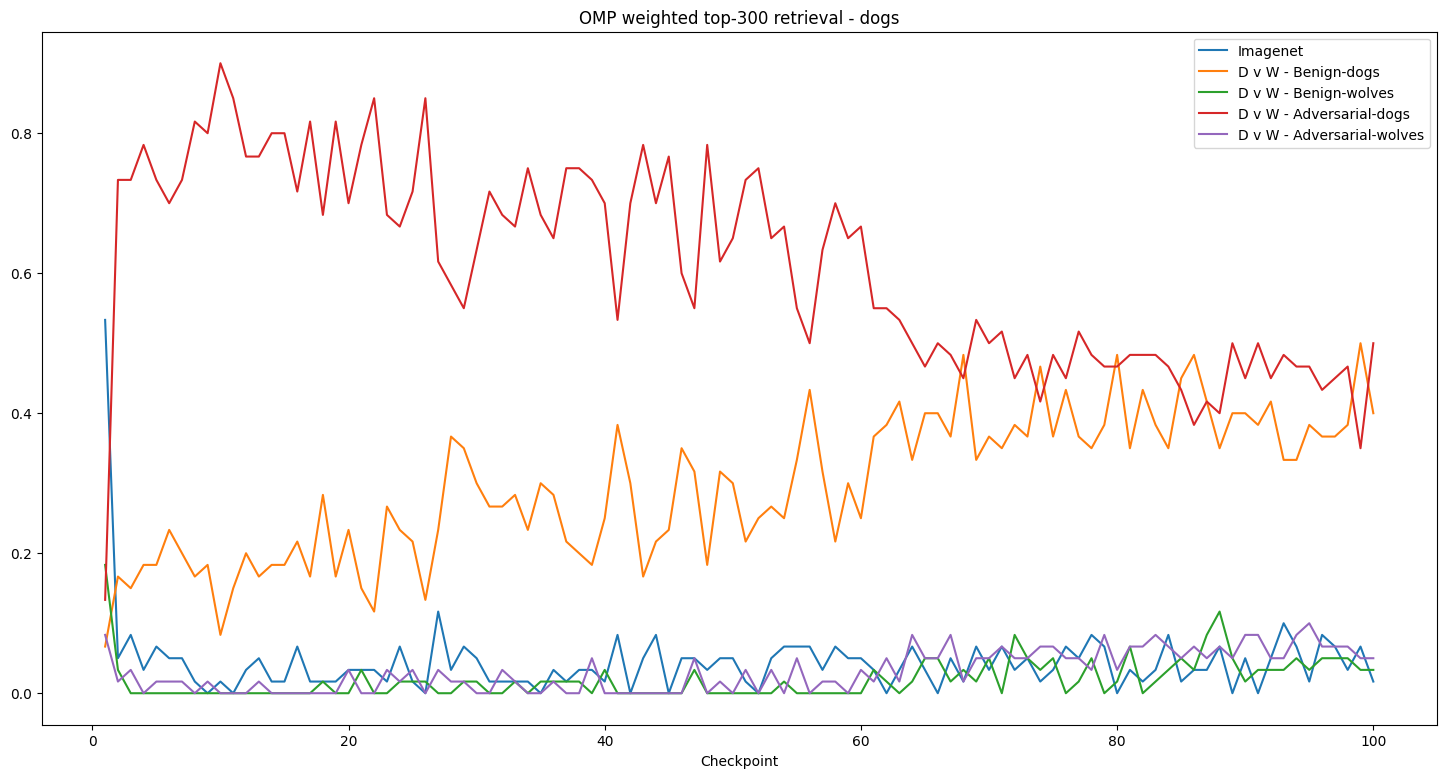

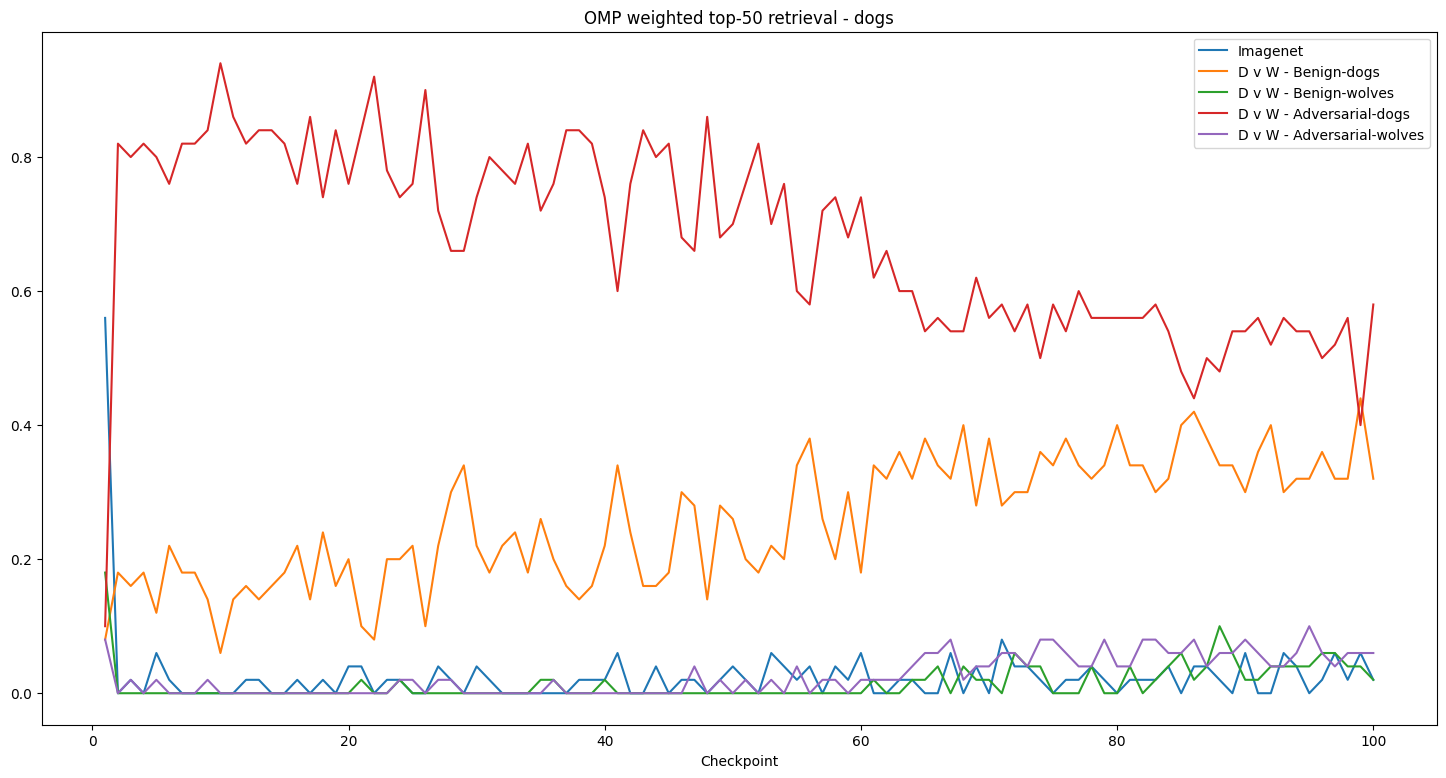

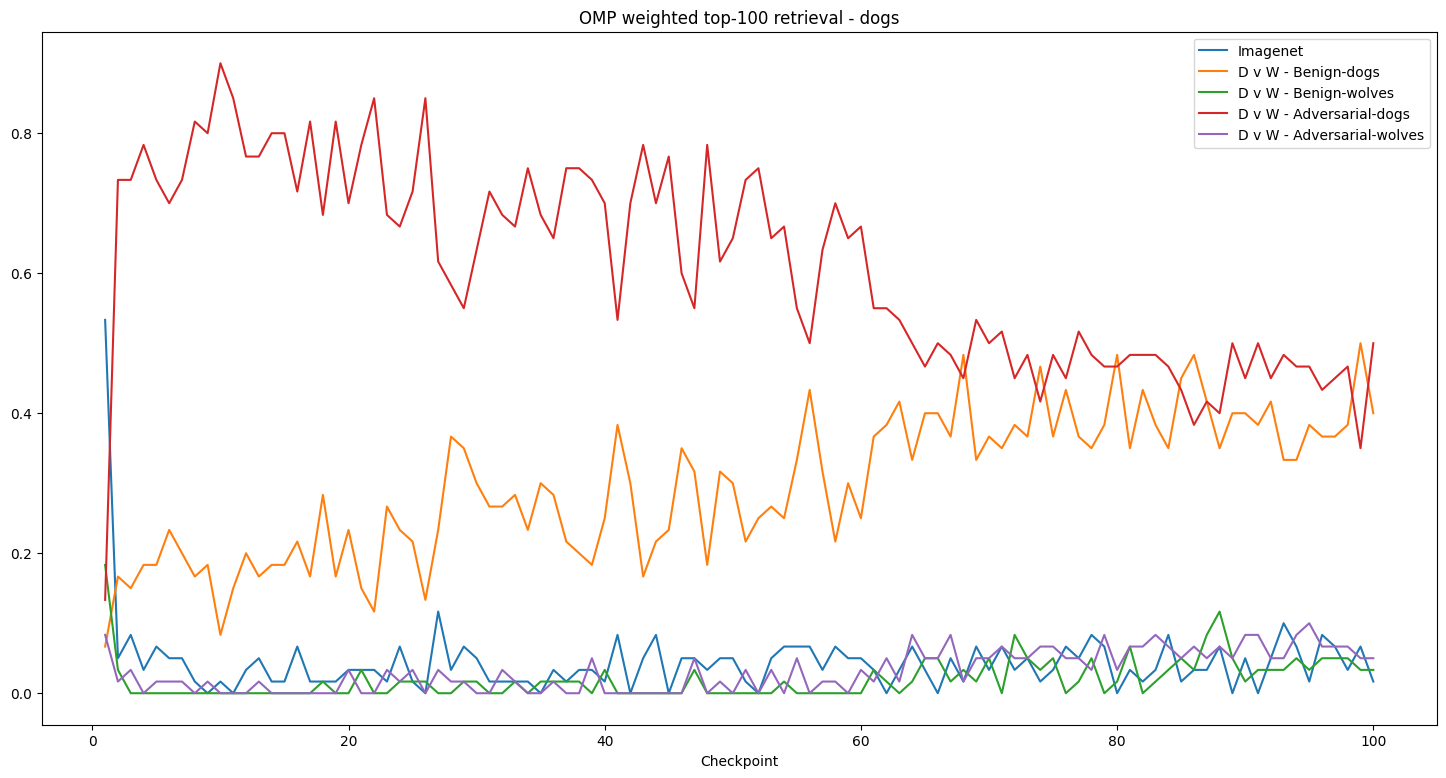

In [5]:
for label in stats.keys():
    top_k = [300, 50, 100]
    all_weights = stats[label]['encountered_weights_dict']
    all_indices = stats[label]['encountered_idxs_dict']
    
    for t_k in top_k:
        ratios = []
        other_label = [lab for lab in list(stats.keys()) if lab != label][0]
        for key in all_indices.keys():
            df_subset = df_train.iloc[all_indices[key]]
            argsort_indices = np.flip(np.argsort(all_weights[key].numpy()), axis=0)    
            df_subset_weighted = df_subset.iloc[argsort_indices]
            df_subset_weighted = df_subset_weighted[0:t_k]
            rat  = [len(df_subset_weighted[df_subset_weighted['data_type'] == 'imagenet_baseline']), 
                    len(df_subset_weighted[(df_subset_weighted['data_type'] == 'benign') & (df_subset_weighted['class'] == label) ]),
                    len(df_subset_weighted[(df_subset_weighted['data_type'] == 'benign') & (df_subset_weighted['class'] == other_label) ]),
                    len(df_subset_weighted[(df_subset_weighted['data_type'] == 'adversarial') & (df_subset_weighted['class'] == label) ]),
                    len(df_subset_weighted[(df_subset_weighted['data_type'] == 'adversarial') & (df_subset_weighted['class'] == other_label) ])
                    ]
                    
            rat = np.asarray(rat)
            rat = rat / np.sum(rat)
            rat = rat.tolist()
            ratios.append(rat)

        ckpts = list(range(1,len(ratios)+1))
        imagenet_ratio = [rat[0] for rat in ratios]
        dvw_benign_ratio_same = [rat[1] for rat in ratios]
        dvw_benign_ratio_opposite = [rat[2] for rat in ratios]
        dvw_adv_ratio_same = [rat[3] for rat in ratios]        
        dvw_adv_ratio_opposite = [rat[4] for rat in ratios]        
        df = {'Checkpoint': ckpts, 'Imagenet': imagenet_ratio, f'D v W - Benign-{label}': dvw_benign_ratio_same, f'D v W - Benign-{other_label}': dvw_benign_ratio_opposite, f'D v W - Adversarial-{label}': dvw_adv_ratio_same, f'D v W - Adversarial-{other_label}': dvw_adv_ratio_opposite}
        df = pd.DataFrame(df)
        df = df.set_index('Checkpoint')
        plt.figure()
        plt.clf()
        ax = sns.lineplot(data=df, dashes=False, legend='auto').set(title=f'OMP weighted top-{t_k} retrieval - {label}')
        filename = subset_path.split("/")[-2] + f'_weighted_top-k-{t_k}-class-{label}' + '.jpg'
        outpath = os.path.join(plot_dir, filename)
        plt.savefig(outpath, dpi=300)


